# Reads an image from a webcam and encodes to send through HTTP using Python [Requests](http://docs.python-requests.org)

In [2]:
%%file Webcam2HTTP.py
import cv2
import time
import os


def snapshot_generator(device=0, sleep=0.25, img_format = 'PNG', img_quality=0, debug=False,filename=None):
    '''
    
    Returns a function that takes a snapshot and returns an buffer already formatted
    
    Parameters:
    
    device: integer, indicates which camera you will use. 
    Normally is 0, but you can check using lsusb (linux) 
    or system_profiler SPUSBDataType (osx).
    
    sleep: float, time the function waits before taking the first snapshot.
           (if there's not enough time, some webcams generate a very dark image) 
    
    img_format: 'PNG' or 'JPG'
    
    img_quality: 0 to 1 if PNG or 0 to 100 if JPG
    
    The returned function controls the generator. Call it without arguments to take a new picture
    or with False to close the device. Closing the device reduces the max frequency.
    '''
    
    
    capture = cv2.VideoCapture(device)
    
    time.sleep(sleep)
    
    if capture.isOpened():
        print "Device initialised, ready to capture!"
    else:
        print "Device failed..."
        return -1
    
    def capture_image_gen(debug,filename):
        while True:
            if debug and filename!=None:
                frame = cv2.imread(os.getcwd()+'/'+filename)
            else:
                grabbed, frame = capture.read()

            if img_format == 'PNG':
                if 1>=img_quality>=0:
                    yield cv2.imencode('.png', cv2.cvtColor(frame, cv2.COLOR_BGR2RGB), 
                                       [cv2.cv.CV_IMWRITE_PNG_COMPRESSION, img_quality])[1].tobytes()
            elif img_format == 'JPG':
                if 100>=img_quality>=0:
                    yield cv2.imencode('.png', cv2.cvtColor(frame, cv2.COLOR_BGR2RGB), 
                                       [cv2.cv.CV_IMWRITE_JPEG_QUALITY, img_quality])[1].tobytes()
            else:
                raise Exception("Error! Image format (img_format) must be \'PNG\' or \'JPG\'!")

                
    init_gen = capture_image_gen(debug,filename)  
    
    def wrapper(cmd=True):
        if cmd:
            return init_gen.next()
        else:
            capture.release() # closes the camera, video file, etc
            print "Device closed, exiting..."
            return 0
        
    return wrapper

Overwriting Webcam2HTTP.py


In [1]:
from Webcam2HTTP import snapshot_generator

In [49]:
#
# Testing snapshot_generator
#

import numpy
import matplotlib.pyplot as plt
%matplotlib inline

snp = snapshot_generator(device=0)

Device initialised, ready to capture!


In [50]:
img = snp() # In my laptop, the camera takes a while until it adapts 
            # to the lighting conditions and a second shot is always necessary...

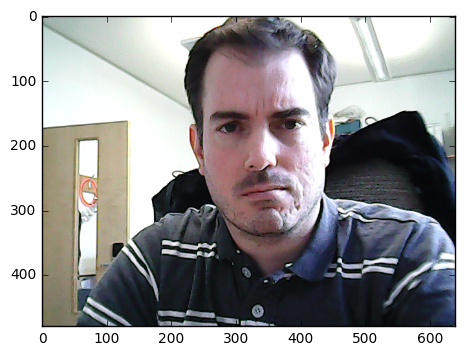

In [51]:
plt.imshow(cv2.imdecode(numpy.frombuffer(img,dtype = numpy.uint8), cv2.cv.CV_LOAD_IMAGE_COLOR))
plt.show()

In [41]:
snp(False)

Device closed, exiting...


0